In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import RegressionModel

In [2]:
stats_data = pd.read_csv('all_player_stats.csv')
income_data = pd.read_csv('all_season_income.csv')
joined = pd.merge(stats_data, income_data, how = 'inner')
joined.replace(r'\N',0, inplace=True) # so model can interpret NAs, more viable option would be to remove rows w/ NAs
joined.head(5)

,player_id,season,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,income,adj_income
0,1,2001,PF,37,MIA,82,1,17.2,1.8,4.0,...,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5,2250000,3981991
1,2230,2023,SG,23,MIL,35,1,9.9,1.5,3.6,...,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4,508891,524000
2,2230,2024,SG,24,MIL,56,0,11.0,1.5,3.5,...,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,1901769,1901769
3,2231,2023,SF,19,ATL,72,12,19.5,3.4,7.4,...,1.6,2.1,1.0,0.6,0.2,0.6,1.2,8.9,3536160,3641154
4,2231,2024,SF,20,ATL,20,0,8.6,0.9,3.1,...,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,3712920,3712920


In [3]:
joined.columns
X = joined[['Age', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]
y = joined['income']

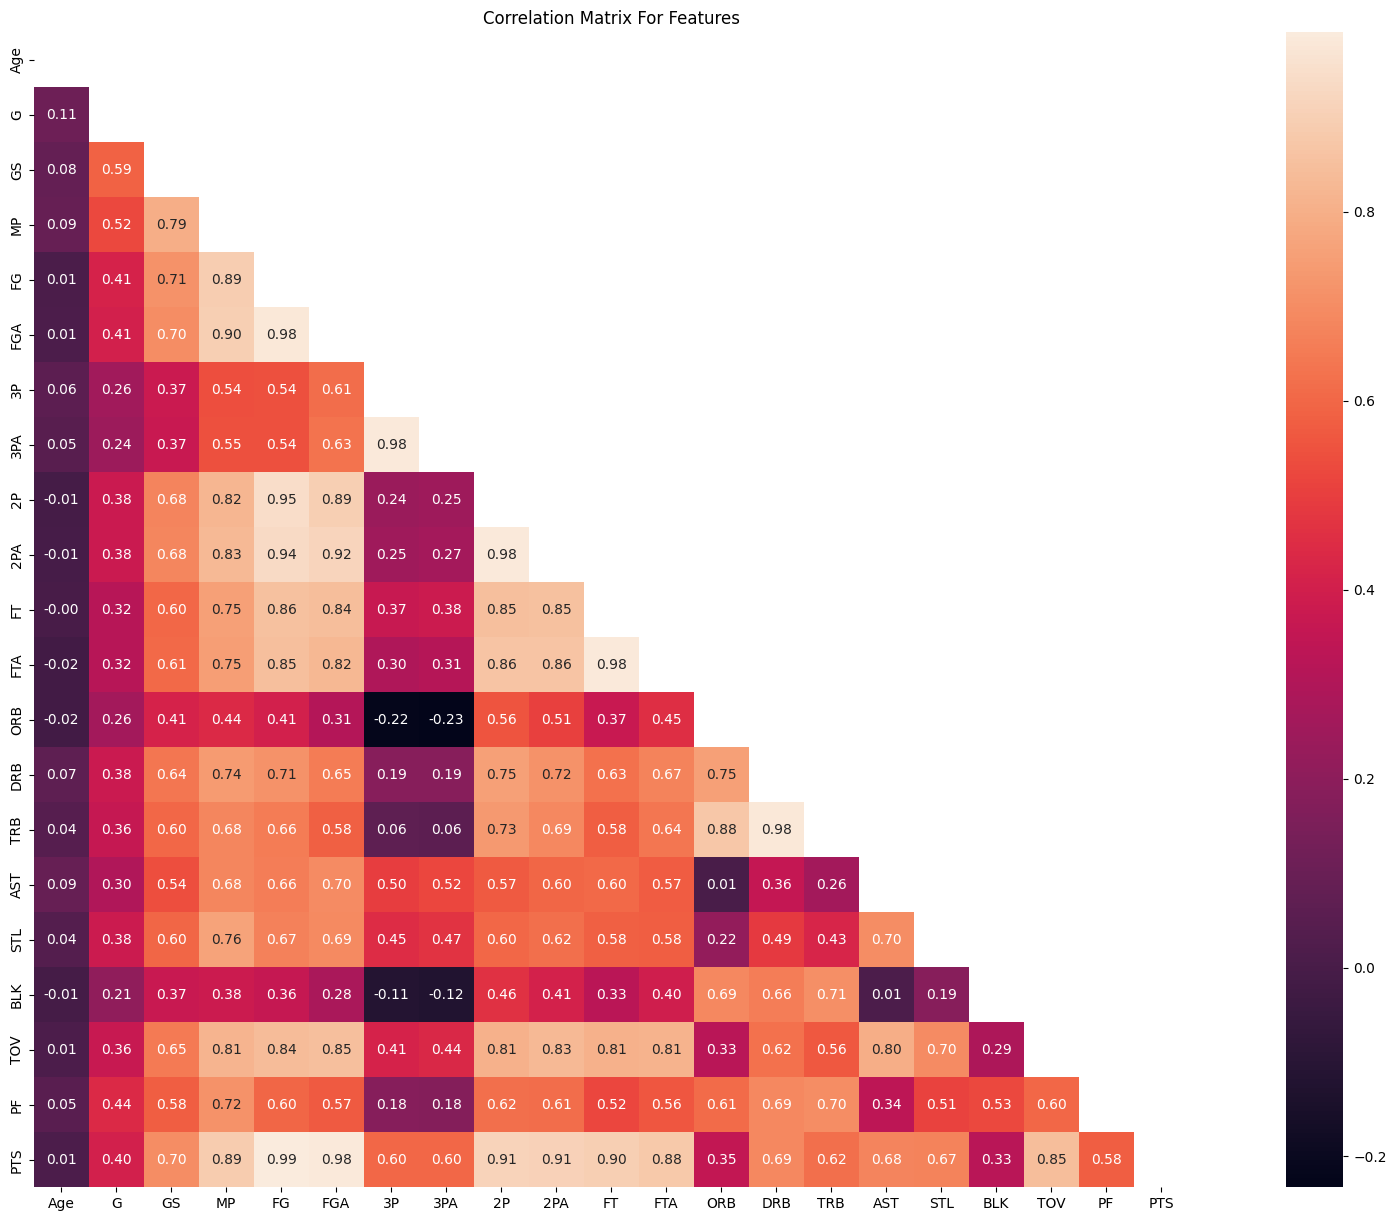

In [4]:
corr = X.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = [25,15])
plt.title("Correlation Matrix For Features")
sns.heatmap(corr, mask=mask, annot = True, square=True, fmt=".2f", cbar = True)
plt.show()

In [5]:
model = RegressionModel(X = X, y = y)
test_size = 0.33
X_train, X_test, y_train, y_test, y_pred = model.split_train_predict(test_size=test_size)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


### Test Accuracy ###: 0.6554557199264033, ### MSE ###: 14827712654645.76


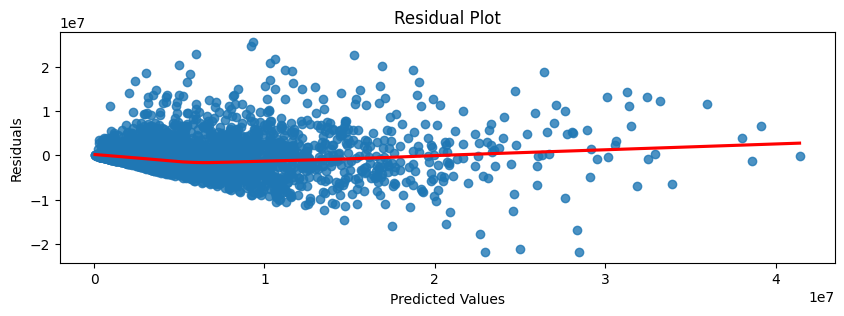

In [6]:
model.get_accuracy(y_test, y_pred)

In [7]:
# 10 fold cross validation
display(model.cross_val(n_splits=10))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   19.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   19.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_mean_squared_error,fold
0,20.248642,0.057955,0.664628,-1.308778e+13,1.308778e+13,1.0
1,20.069851,0.053942,0.638918,-1.470592e+13,1.470592e+13,2.0
2,20.883880,0.052410,0.679207,-1.582863e+13,1.582863e+13,3.0
3,20.008280,0.054277,0.617954,-1.737659e+13,1.737659e+13,4.0
4,20.044351,0.053427,0.622078,-1.470940e+13,1.470940e+13,5.0
5,20.079136,0.052641,0.650243,-1.795522e+13,1.795522e+13,6.0
6,19.889552,0.050221,0.684671,-1.525445e+13,1.525445e+13,7.0
7,20.052475,0.050973,0.655625,-1.467489e+13,1.467489e+13,8.0
8,20.656589,0.052354,0.674157,-1.390085e+13,1.390085e+13,9.0
9,20.013740,0.050267,0.673372,-1.660791e+13,1.660791e+13,10.0


In [8]:
rf_params = {
    'n_estimators': [100, 300], 
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [20, 30],
    'max_features': ['sqrt', 'log2']
}

model.tune_hyperparameters(hypermarameters=rf_params, X_train=X_train, y_train=y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300,
                      random_state=0, verbose=True)


RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300,
                      random_state=0, verbose=True)